# Import Libraries

In [84]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

#### About this file

CSV format having 6362620 rows and 10 columns

#### Columns Details

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

In [85]:
df = pd.read_csv("Fraud.csv")

In [86]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [87]:
# checking the data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
# checking the shape of the data
df.shape

(6362620, 11)

In [7]:
# checking the head of the data
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [8]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
# describing the data
df.describe().transpose()

count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFraud         6362620.0  1.290820e-03  3.590480e-02  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05  3.560159e+08  
newbalanceDest  214661.440  1.111909e+06  3.561793e+08  
isFraud              0.000  0.000000e+00  1.000000e+00  
isFlaggedFraud       0.000  0.000000e+00  1.000000e+00

In [52]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [53]:
# checking the correlation between the variables with the target variable
df.corr()["isFraud"].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

<AxesSubplot:>

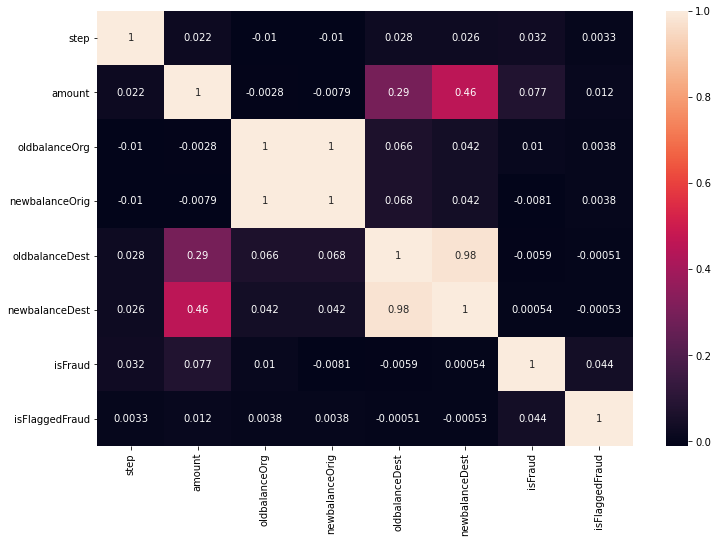

In [12]:
# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [78]:
df["isFraud"].value_counts()
# as we see here we have an unbalanced dataset
# more than 90 % of the data is not fraud

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
# checking the payment type of the transactions
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

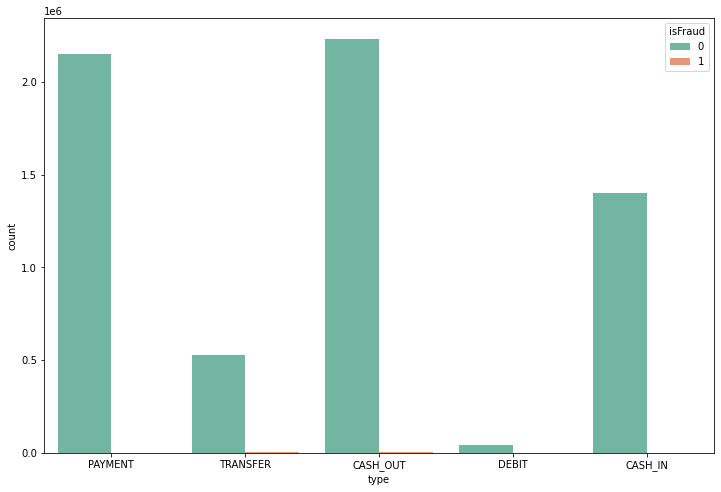

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 

In [88]:
# dropping the variables that are not needed
# making a copy of the data
df_copy = df.copy()
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [89]:
# columns with object type
df_copy.select_dtypes(include=["object"]).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [90]:
# droping NameOrig and NameDest
df_copy.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [91]:
df_copy.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

In [92]:
#Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["type"] = le.fit_transform(df_copy["type"])

In [93]:
df_copy.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

In [94]:
# dropping the isFlaggedFraud variable as we dont need it
df_copy.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [95]:
df_copy.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

# Classification Model

we will use **Logistic Regression**

In [96]:
# First we need to create a training and test set
from sklearn.model_selection import train_test_split
X = df_copy.drop("isFraud",axis=1).values
y = df_copy["isFraud"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [97]:
print(X_test[0])

[2.7800000e+02 0.0000000e+00 3.3021842e+05 2.0866000e+04 3.5108442e+05
 4.5241957e+05 1.2220115e+05]


In [98]:
# we need to feature scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
print(X_test[0])

[ 0.24316291 -1.2696211   0.25009357 -0.28144733 -0.1722693  -0.19079889
 -0.30045128]


In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

In [101]:
# checking the accuracy of the model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1270829      75]
 [    943     677]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.42      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test, pred)

0.9992000150881241

# Test the model

Let's test the model by using 1 single test data and see the trasaction is fraud or not.

In [109]:
X_test1 = sc.transform([[2.780, 0.00, 3.302, 2.086, 3.510, 4.52, 1.22]])

In [111]:
pred1 = log_reg.predict(X_test1)
pred1

array([0], dtype=int64)

As we are getting 0 in the output, the model predicts that this is not a the fraud trasaction.

# Save model

In [112]:
# Save model

import pickle

filename = 'finalized_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [113]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open("finalized_model.sav", 'rb'))

In [114]:
result = loaded_model.predict(X_test1)

In [115]:
print(result)

[0]
